<h1>Numba-results visualisation</h1><br>


In [2]:
import sys
print (sys.version)
print("Version info.")
print (sys.version_info)
import ipywidgets as widgets
from IPython.display import display

3.5.3 (default, Sep 27 2018, 17:25:39) 
[GCC 6.3.0 20170516]
Version info.
sys.version_info(major=3, minor=5, micro=3, releaselevel='final', serial=0)


<h1> #### UPDATE IT SO THAT THERE IS AN OPTION FOR CONVOLVED PRE-PROCESSING </h1>

In [3]:
import os
import glob
ROOT_PATH ="./optimization/"
found_files = glob.glob(ROOT_PATH+"**/*.csv", recursive=True)


In [8]:
selected_file =widgets.Dropdown(
    options=[(str(fff.split("/")[-1:][0]), fff) for fff in found_files],
    value=found_files[0],
    description='File one of the available files:',
    disabled=False,
)
display(selected_file)

user_selected_file = selected_file.value


Dropdown(description='File one of the available files:', options=(('pm_normal_images_5_256.csv', './optimizati…

./optimization/2/numba_pm/pm_normal_images_5_256.csv


In [9]:
import pandas as pd
temp_path = user_selected_file
results_data_frame = pd.read_csv(temp_path)
results_data_frame.columns = [str.strip(col) for col in results_data_frame.columns]

results_data_frame.describe()



,match,gap,egap,matrix_init_mode,runtime,euclid_distance,mse,ABS_ERR
count,1554.000000,1554.000000,1554.000000,1554.0,1554.000000,1554.000000,1554.000000,1554.000000
mean,263.558559,-80.148005,-55.521879,2.0,9.909111,30421.054968,11452.415109,68.365927
std,86.304322,64.220854,41.002299,0.0,0.104564,18789.874225,11987.970024,55.585124
min,140.000000,-250.000000,-155.000000,2.0,9.695765,2085.089926,38.951405,2.517076
25%,160.000000,-120.000000,-80.000000,2.0,9.870340,14344.909453,1843.610508,24.247357
50%,240.000000,-80.000000,-48.000000,2.0,9.912936,29230.134800,7654.823596,57.345278
75%,320.000000,-30.000000,-22.000000,2.0,9.938234,35397.905694,11226.094176,80.023310
max,400.000000,0.000000,-2.000000,2.0,11.515848,67807.545576,41193.585481,185.558549


In [17]:
results_data_frame.sort_values(by="ABS_ERR").head()

,img_name,is_img_preprocessed,alg_type,is_parallel,match,gap,egap,matrix_init_mode,convolution_filters,filter_strategy,matching_mode,runtime,euclid_distance,mse,ABS_ERR
93,sintel_sm_convolved_230_512,yes,sm_numba_matcher_stacked,True,20.0,-70.0,-10.0,2,see-filter-strategy,filter: 3,occlusions_added_to_the_groundtruth,51.536922,63112.653953,8456.197115,64.224556
153,sintel_sm_convolved_230_512,yes,sm_numba_matcher_stacked,True,20.0,-70.0,-10.0,2,see-filter-strategy,filter: 3,occlusions_added_to_the_groundtruth,51.536350,63112.653953,8456.197115,64.224556
111,sintel_sm_convolved_230_512,yes,sm_numba_matcher_stacked,True,10.0,-30.0,-10.0,2,see-filter-strategy,filter: 3,occlusions_added_to_the_groundtruth,51.596859,63018.850672,8431.079186,64.293784
15,sintel_sm_convolved_230_512,yes,sm_numba_matcher_stacked,True,10.0,-30.0,-10.0,2,see-filter-strategy,filter: 3,occlusions_added_to_the_groundtruth,51.548862,63018.850672,8431.079186,64.293784
171,sintel_sm_convolved_230_512,yes,sm_numba_matcher_stacked,True,10.0,-30.0,-10.0,2,see-filter-strategy,filter: 3,occlusions_added_to_the_groundtruth,51.493977,63018.850672,8431.079186,64.293784


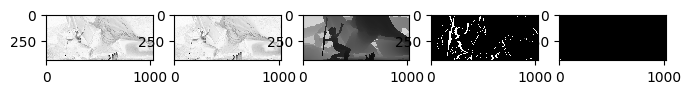

In [18]:
from components.classes.SintelReader import SintelReader
path = "./datasets/sintel/training"
reader = SintelReader(rootPath=path)
#reader.print_available_scenes()

SELECTED_SCENE = 'cave_4'

reader.set_selected_scene(SELECTED_SCENE)
loaded_imgs = reader.get_selected_scene_next_files()
SintelReader.plot_images_to_compare(loaded_imgs)

In [19]:
from components.classes.NumbaSimpleMatcher import Wrapper as m
import matplotlib.pyplot as plt

ORIGINAL_IMG_DIM = loaded_imgs[0].shape
STARTING_ROW_FOR_SLICES = int(ORIGINAL_IMG_DIM[0])
ROW_HEIGHT_PER_SLICE = 5
NUMBER_OF_COLUMNS = int(ORIGINAL_IMG_DIM[1]/2)
SLICE_DIM = [ROW_HEIGHT_PER_SLICE, NUMBER_OF_COLUMNS]

optimizer_img = reader.get_selected_scene_next_files()

selected_metric = "ABS_ERR"
top_5_config = results_data_frame.sort_values(by=selected_metric).head()
top_5_config = top_5_config[["match", "gap", "egap", selected_metric]].values

CPU times: user 55min 17s, sys: 15.2 s, total: 55min 32s
Wall time: 1min 40s


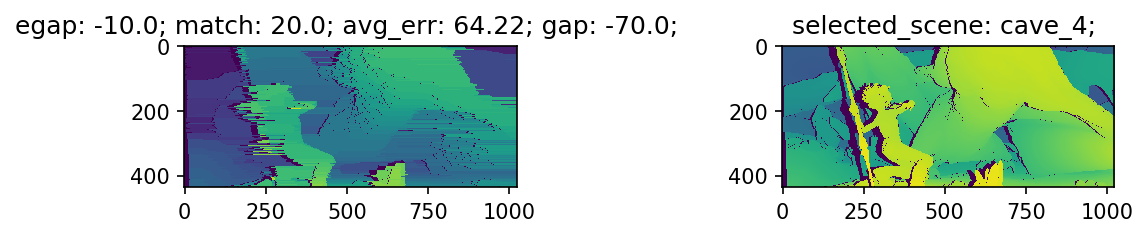

CPU times: user 54min 54s, sys: 29 s, total: 55min 23s
Wall time: 1min 33s


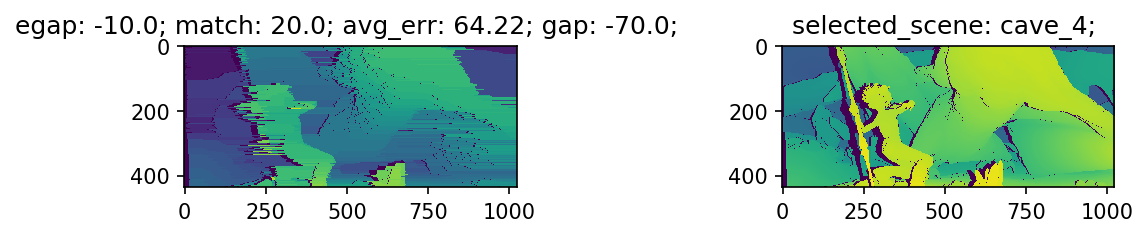

CPU times: user 55min 16s, sys: 5.01 s, total: 55min 21s
Wall time: 1min 33s


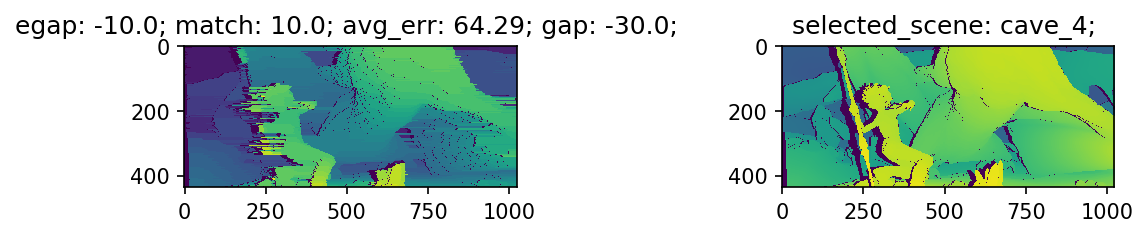

CPU times: user 55min 15s, sys: 4.88 s, total: 55min 19s
Wall time: 1min 33s


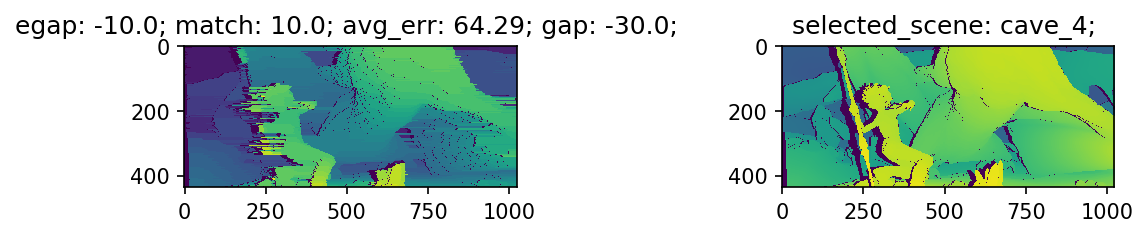

CPU times: user 55min 50s, sys: 5.49 s, total: 55min 56s
Wall time: 1min 34s


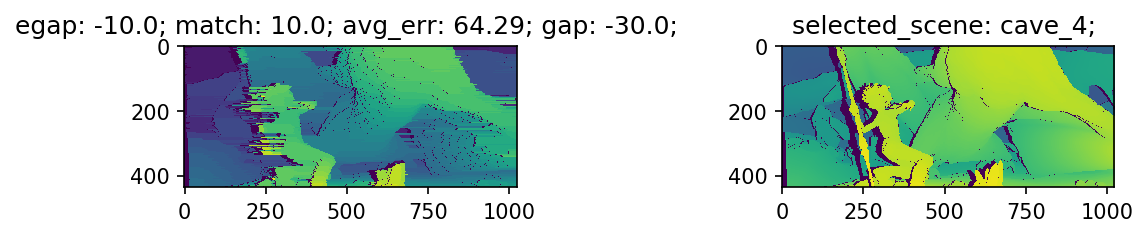

In [20]:
for params in top_5_config:
  matcher = m(params[0], params[1], params[2])
  matcher.set_images(optimizer_img[1], optimizer_img[0])  
  matcher.configure_instance()      
  %time x,raw_disp_map = matcher.run_pipeline()
  gt = SintelReader.add_masks_to_raw_disparity(optimizer_img[2], optimizer_img[3], optimizer_img[4])
  disp_params = {"match": params[0], "gap": params[1], "egap": params[2], selected_metric: "{0:.2f}".format(params[3])}
  gt_params = {"selected_scene": SELECTED_SCENE}
  SintelReader.plot_disp_and_gt(raw_disp_map, gt, disp_params, gt_params, dpi=150)

CPU times: user 1h 3min 47s, sys: 7.18 s, total: 1h 3min 54s
Wall time: 1min 48s


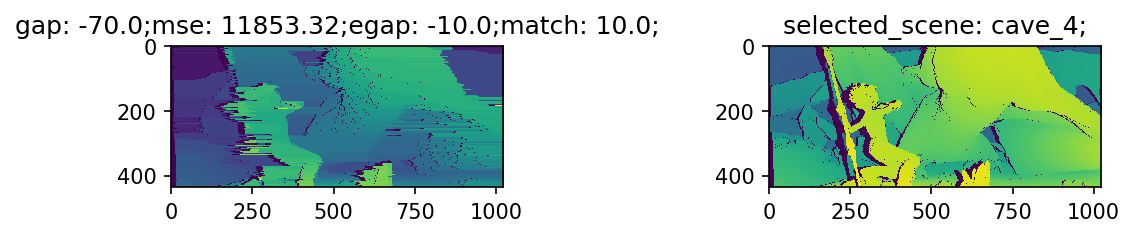

CPU times: user 1h 7min 47s, sys: 5.72 s, total: 1h 7min 53s
Wall time: 1min 54s


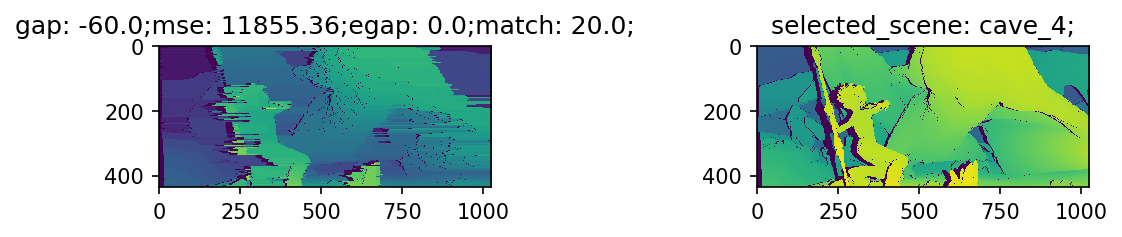

CPU times: user 1h 5min 32s, sys: 5.86 s, total: 1h 5min 38s
Wall time: 1min 50s


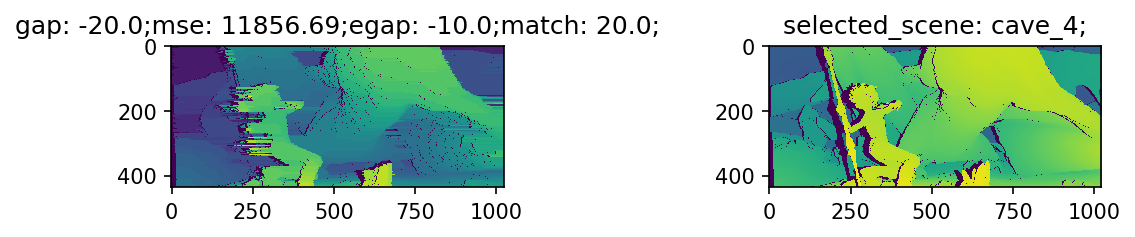

CPU times: user 1h 1min 25s, sys: 6.14 s, total: 1h 1min 32s
Wall time: 2min 17s


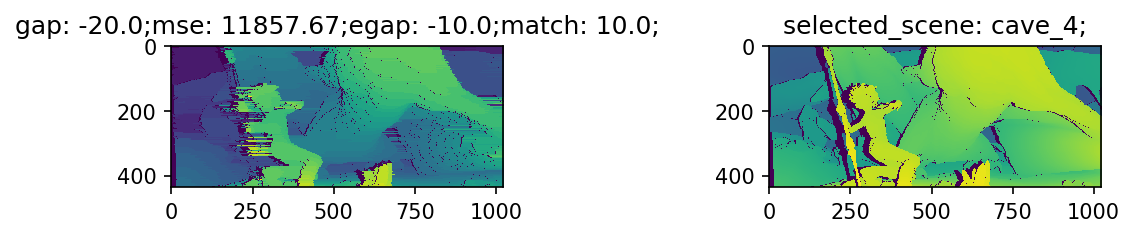

CPU times: user 50min 34s, sys: 6.58 s, total: 50min 41s
Wall time: 2min 28s


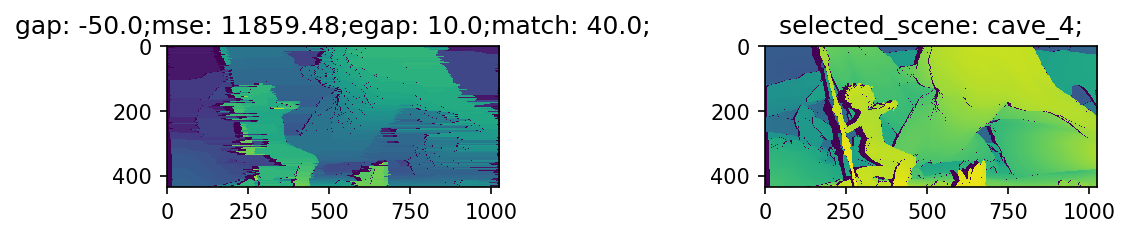

In [12]:
selected_metric = "mse"
top_5_config = results_data_frame.sort_values(by=selected_metric).head()
top_5_config = top_5_config[["match", "gap", "egap", selected_metric]].values


for params in top_5_config:
  matcher = m(params[0], params[1], params[2])
  matcher.set_images(optimizer_img[1], optimizer_img[0])  
  matcher.configure_instance()      
  %time x,raw_disp_map = matcher.run_pipeline()
  gt = SintelReader.add_masks_to_raw_disparity(optimizer_img[2], optimizer_img[3], optimizer_img[4])
  disp_params = {"match": params[0], "gap": params[1], "egap": params[2], selected_metric: "{0:.2f}".format(params[3])}
  gt_params = {"selected_scene": SELECTED_SCENE}
  SintelReader.plot_disp_and_gt(raw_disp_map, gt, disp_params, gt_params, dpi=150)


CPU times: user 47min 8s, sys: 6 s, total: 47min 14s
Wall time: 2min 41s


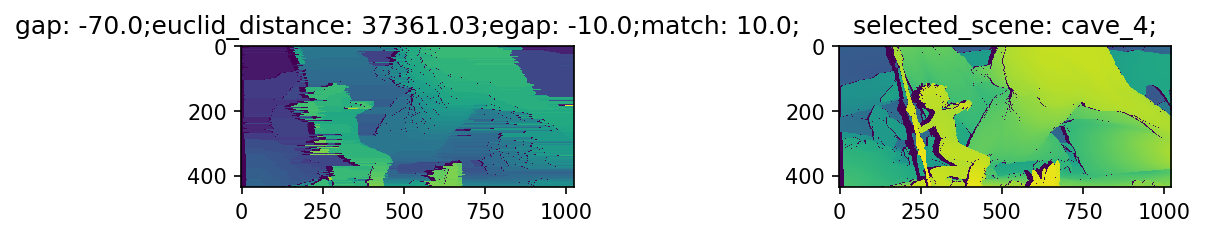

CPU times: user 45min 42s, sys: 6.46 s, total: 45min 48s
Wall time: 2min 14s


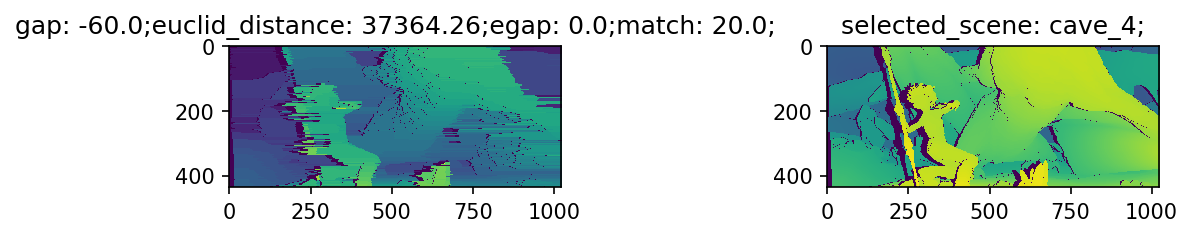

CPU times: user 1h 1min 56s, sys: 5.97 s, total: 1h 2min 2s
Wall time: 1min 45s


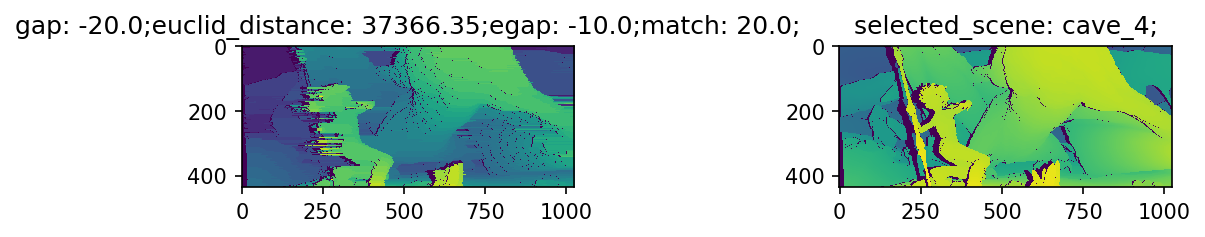

CPU times: user 1h 6min 32s, sys: 6.14 s, total: 1h 6min 38s
Wall time: 1min 52s


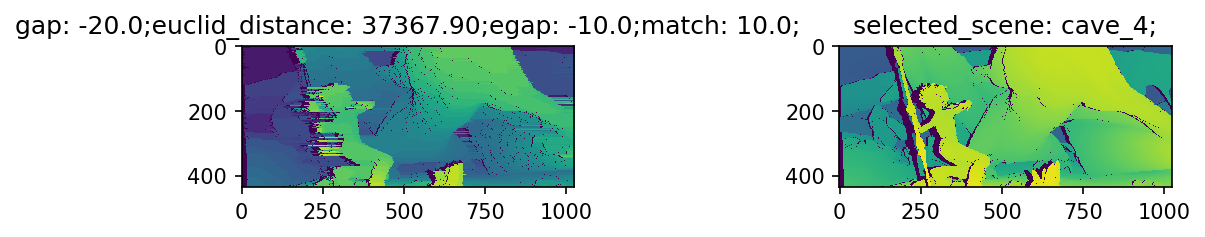

CPU times: user 1h 5min 2s, sys: 5.89 s, total: 1h 5min 8s
Wall time: 1min 49s


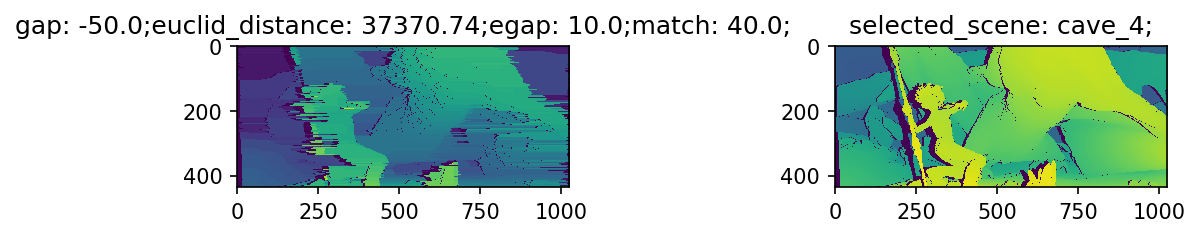

In [13]:
selected_metric = "euclid_distance"
top_5_config = results_data_frame.sort_values(by=selected_metric).head()
top_5_config = top_5_config[["match", "gap", "egap", selected_metric]].values


for params in top_5_config:
  matcher = m(params[0], params[1], params[2])
  matcher.set_images(optimizer_img[1], optimizer_img[0])  
  matcher.configure_instance()      
  %time x,raw_disp_map = matcher.run_pipeline()
  gt = SintelReader.add_masks_to_raw_disparity(optimizer_img[2], optimizer_img[3], optimizer_img[4])
  disp_params = {"match": params[0], "gap": params[1], "egap": params[2], selected_metric: "{0:.2f}".format(params[3])}
  gt_params = {"selected_scene": SELECTED_SCENE}
  SintelReader.plot_disp_and_gt(raw_disp_map, gt, disp_params, gt_params, dpi=150)


In [25]:
import importlib
importlib.reload(plu)

<module 'components.non_oo_entities.plot_utils' from 'C:\\gdrive\\python_projects\\FYP\\components\\non_oo_entities\\plot_utils.py'>

In [26]:
#slice and dice data here please, also, ensure that the ABS_ERRor is converted to float64
from components.non_oo_entities import plot_utils as plu
x_axis = "match"
y_axis = "gap"
z_axis = "egap"
metrix ="ABS_ERR"
plu.plotly_3d_results(x_axis, y_axis, z_axis, metrix, results_data_frame)

In [20]:
#slice and dice data here please, also, ensure that the ABS_ERRor is converted to float64
x_axis = "match"
y_axis = "gap"
z_axis = "egap"
metrix ="mse"

plu.plotly_3d_results(x_axis, y_axis, z_axis, metrix, results_data_frame )

In [5]:
#slice and dice data here please, also, ensure that the ABS_ERRor is converted to float64
x_axis = "match"
y_axis = "gap"
z_axis = "egap"
metrix ="euclid_distance"
plu.plotly_3d_results(x_axis, y_axis, z_axis, metrix, results_data_frame)